In [1]:
import numpy
import matplotlib.pyplot as plt
from dcFBA.Models import CommunityModel
from dcFBA.DynamicModels import DynamicJointFBA

from ecoli_models import (
    get_leucine_knock_out_model,
    get_lysine_knock_out_model,
)

pyparsing import

INFO: No xlwt module available, Excel spreadsheet creation disabled
CBGLPK based on swiglpk: not all methods implimented yet! 5.0

*****
Using CPLEX
*****

doFBAMinSum not available with GLPK

INFO: No xlrd module available, Excel spreadsheet reading disabled


***********************************************************************
* Welcome to CBMPy (0.8.4) - PySCeS Constraint Based Modelling        *
*                http://cbmpy.sourceforge.net                         *
* Copyright(C) Brett G. Olivier 2014 - 2020                           *
* Systems Biology Lab, Vrije Universiteit Amsterdam                   *
* Amsterdam, The Netherlands                                          *
* CBMPy is developed as part of the BeBasic MetaToolKit Project       *
* Distributed under the GNU GPL v 3.0 licence, see                    *
* LICENCE (supplied with this release) for details                    *
***********************************************************************


In [2]:
leucine_knock_out = get_leucine_knock_out_model()
lysine_knock_out = get_lysine_knock_out_model()

getState1
Model clone time: 2.3537518978118896
getState1
Model clone time: 2.1773529052734375


In [3]:
#Set creation of the metabolites to zero
leucine_knock_out.getReaction("R_IPPS").setUpperBound(0)
lysine_knock_out.getReaction("R_DAPDC").setUpperBound(0)


leucine_knock_out.getReaction("R_LYStex").setLowerBound(-1000)
leucine_knock_out.getReaction("R_LYStex").setUpperBound(1000)


lysine_knock_out.getReaction("R_LEUtex").setLowerBound(-1000)
lysine_knock_out.getReaction("R_LEUtex").setUpperBound(1000)


#Restrict the release of glucose
leucine_knock_out.getReaction("R_GLCtex_copy1").setUpperBound(10)
leucine_knock_out.getReaction("R_GLCtex_copy2").setUpperBound(0)
lysine_knock_out.getReaction("R_GLCtex_copy1").setUpperBound(10)
lysine_knock_out.getReaction("R_GLCtex_copy2").setUpperBound(0)


#R_FE3tex settings from paper
leucine_knock_out.getReaction("R_FE3tex").setUpperBound(0)
lysine_knock_out.getReaction("R_FE3tex").setUpperBound(0)

In [4]:
#Build the community model
community_model:CommunityModel = CommunityModel(
    [leucine_knock_out, lysine_knock_out],
    ["R_BIOMASS_Ec_iAF1260_core_59p81M", "R_BIOMASS_Ec_iAF1260_core_59p81M"],
    ["dleu", "dlys"],
)


Deleting reagent: R_2AGPG161tipp_M_2agpg161_c
Deleting reagent: R_2AGPGAT161_M_2agpg161_c
Deleting reagent: R_LPLIPAL2G161_M_2agpg161_c
Deleting reagent: R_LPLIPAL2ATG161_M_2agpg161_c
Deleting reagent: R_2AGPG161tipp_M_2agpg161_p
Deleting reagent: R_PLIPA1G161pp_M_2agpg161_p
Deleting reagent: R_2AGPG180tipp_M_2agpg180_c
Deleting reagent: R_2AGPGAT180_M_2agpg180_c
Deleting reagent: R_LPLIPAL2G180_M_2agpg180_c
Deleting reagent: R_LPLIPAL2ATG180_M_2agpg180_c
Deleting reagent: R_2AGPG180tipp_M_2agpg180_p
Deleting reagent: R_PLIPA1G180pp_M_2agpg180_p
Deleting reagent: R_2AGPG181tipp_M_2agpg181_c
Deleting reagent: R_2AGPGAT181_M_2agpg181_c
Deleting reagent: R_LPLIPAL2G181_M_2agpg181_c
Deleting reagent: R_LPLIPAL2ATG181_M_2agpg181_c
Deleting reagent: R_2AGPG181tipp_M_2agpg181_p
Deleting reagent: R_PLIPA1G181pp_M_2agpg181_p
Deleting reagent: R_ACHBS_M_2ahbut_c
Deleting reagent: R_KARA2_M_2ahbut_c
Deleting reagent: R_DSERDHr_M_2amsa_c
Deleting reagent: R_LSERDHr_M_2amsa_c
Deleting reagent: R_AO

In [5]:
#R_O2tex oxygen
community_model.getReaction("R_EX_o2_e").setLowerBound(-30) #Vou;d also be set to 2* 18.5
community_model.getReaction("R_EX_cbl1_e").setLowerBound(-0.02) #2 * initial value of 0.01



In [11]:
dj = DynamicJointFBA(
    community_model,
    [0.0027, 0.0027],
    {"M_glc__D_e": 11.96 , "M_leu__L_e": 0, "M_lys__L_e": 0},
)


getState1
Model clone time: 33.15938401222229

Reaction "X_comm" bounds set to: -INF <= X_comm <= INF
Add reagents with cmod.createReactionReagent(X_comm, metabolite, coefficient)
Adding objective: X_comm_objective
Objective X_comm_objective (idx=0) set active


In [12]:
def stop (sim, used_time, run_condition):
    if sim.biomasses["dleu"][-1] + sim.biomasses["dlys"][-1] >= 0.083:
        #Stop the simulation by setting community reaction to zero, solution will be zero or nan
        sim.model.getReaction("X_comm").setUpperBound(0)

    return 0




In [ ]:



# import pickle

# with open("../../output/djFBA/release/constrained_model.pkl", "rb") as file:
#     dj_release_test = pickle.load(file)


In [13]:
dj.simulate(0.1, epsilon=0.00001,  deviate=stop)


Updating gene activity network ... done.

cplx_constructLPfromFBA time: 0.09252190589904785


cplx_analyzeModel FBA --> LP time: 0.09353089332580566

Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Parallel mode: deterministic, using up to 8 threads for concurrent optimization:
 * Starting dual Simplex on 1 thread...
 * Starting Barrier on 6 threads...
 * Starting primal Simplex on 1 thread...
Tried aggregator 1 time.
LP Presolve eliminated 670 rows and 1317 columns.
Aggregator did 1932 substitutions.
Reduced LP has 436 rows, 1217 columns, and 6298 nonzeros.
Presolve time = 0.01 sec. (7.56 ticks)
Initializing dual steep norms . . .

Iteration log . . .
Iteration:     1   Scaled dual infeas =             2.000000
Iteration:    62   Scaled dual infeas =             2.000000
Perturbation started.
Iteration:   101   Scaled dual infeas =             1.999999
Iteration:   135   Dual objective     =            13.860764
Iteration:   196

In [15]:
biomasses = dj.get_biomasses()
metabolites= dj.get_metabolites()
time_points = dj.get_time_points()

<h3> Plot biomasses

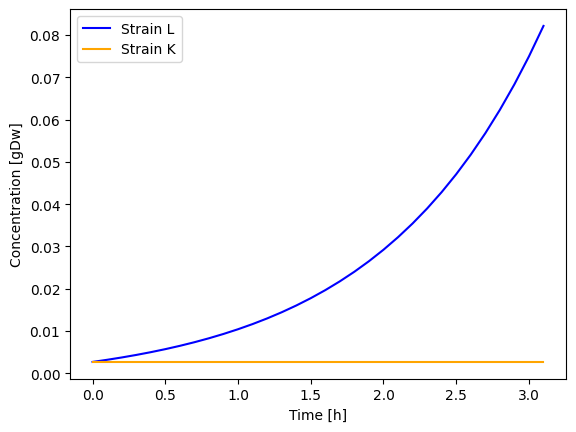

In [17]:
plt.plot(time_points, biomasses["dleu"], color="blue", label="Strain L")
plt.plot(time_points, biomasses["dlys"], color="orange", label="Strain K")
plt.xlabel("Time [h]")
plt.ylabel("Concentration [gDw]")
plt.legend()
plt.show()


<h3> Metabolite concentrations

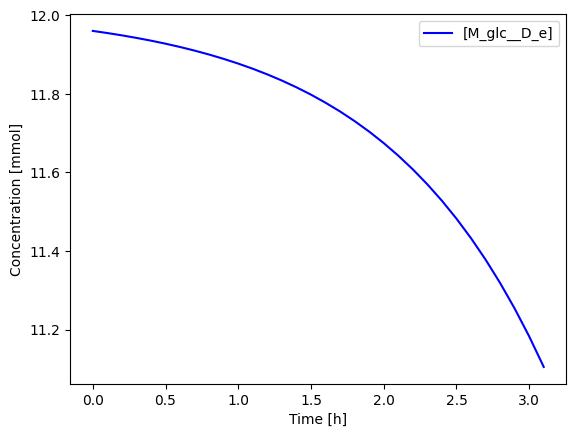

In [18]:
plt.plot(time_points, metabolites["M_glc__D_e"], color="blue", label="[M_glc__D_e]")
plt.xlabel("Time [h]")
plt.ylabel("Concentration [mmol]")
# Adding legend
plt.legend()
plt.show()

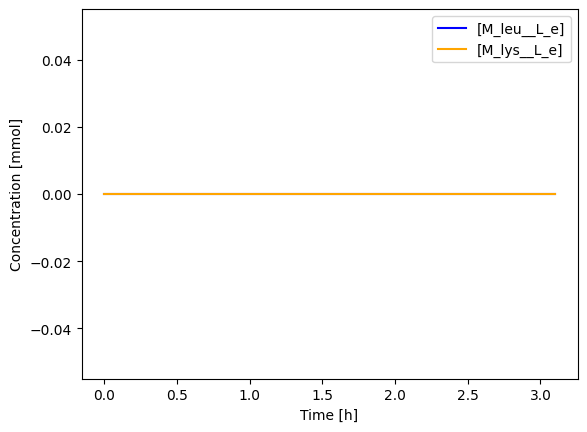

In [19]:
plt.plot(time_points, metabolites["M_leu__L_e"], color="blue", label="[M_leu__L_e]")
plt.plot(time_points, metabolites["M_lys__L_e"], color="orange", label="[M_lys__L_e]")
plt.xlabel("Time [h]")
plt.ylabel("Concentration [mmol]")
# Adding legend
plt.legend()
plt.show()

<h3> Plot fluxes

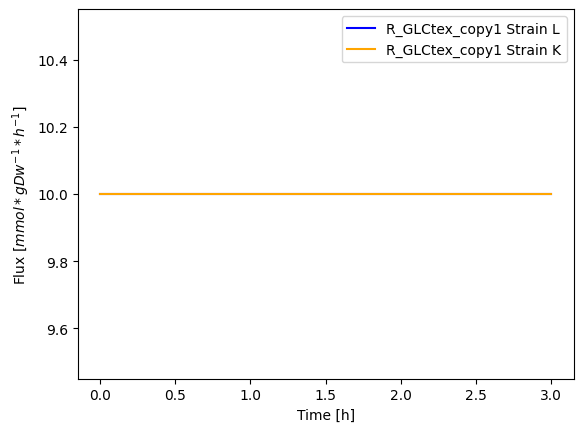

In [20]:
ls1 = dj.get_specific_flux_values("R_GLCtex_copy1_dleu") 
ls2 = dj.get_specific_flux_values("R_GLCtex_copy1_dlys") 

plt.plot(time_points[:-1], ls1, color="blue", label=f"R_GLCtex_copy1 Strain L")
plt.plot(time_points[:-1], ls2, color=f"Orange", label=f"R_GLCtex_copy1 Strain K")
plt.xlabel("Time [h]")
plt.ylabel(r'Flux [$mmol * gDw^{-1} * h^{-1}$]')
plt.legend()

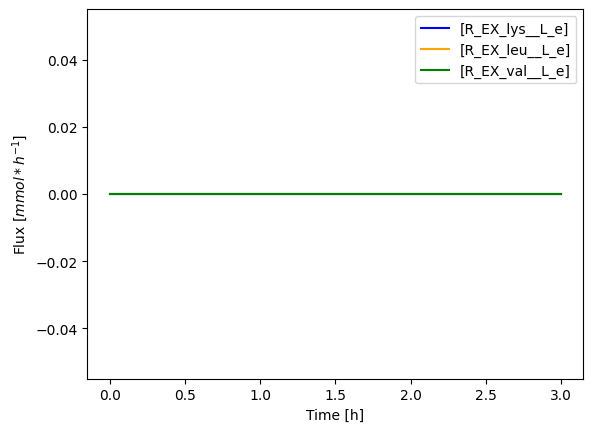

In [23]:
ls1 = dj.get_flux_values("R_EX_lys__L_e") 
ls2= dj.get_flux_values("R_EX_leu__L_e") 
ls3 = dj.get_flux_values("R_EX_val__L_e") 
plt.plot(time_points[:-1], ls1, color="blue", label=f"[R_EX_lys__L_e]")
plt.plot(time_points[:-1], ls2, color=f"Orange", label=f"[R_EX_leu__L_e]")
plt.plot(time_points[:-1], ls3, color=f"green", label=f"[R_EX_val__L_e]")
plt.xlabel("Time [h]")
plt.ylabel(r'Flux [$mmol * h^{-1}$]')
plt.legend()


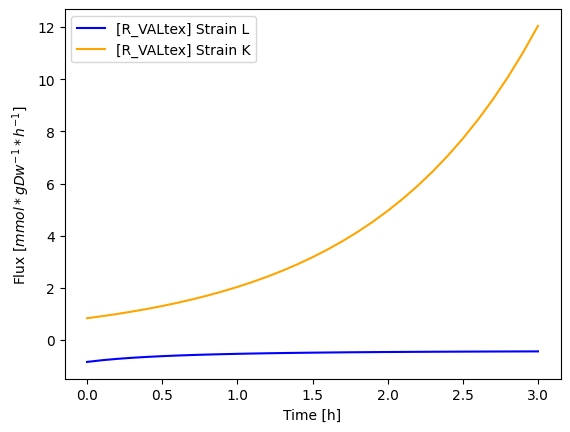

In [24]:
ls1 = dj.get_specific_flux_values("R_VALtex_dleu") 
ls2 = dj.get_specific_flux_values("R_VALtex_dlys") 

plt.plot(time_points[:-1], ls1, color="blue", label=f"[R_VALtex] Strain L")
plt.plot(time_points[:-1], ls2, color=f"Orange", label=f"[R_VALtex] Strain K")
plt.xlabel("Time [h]")
plt.ylabel(r'Flux [$mmol * gDw^{-1} * h^{-1}$]')
plt.legend()

<h3> Community growth rate

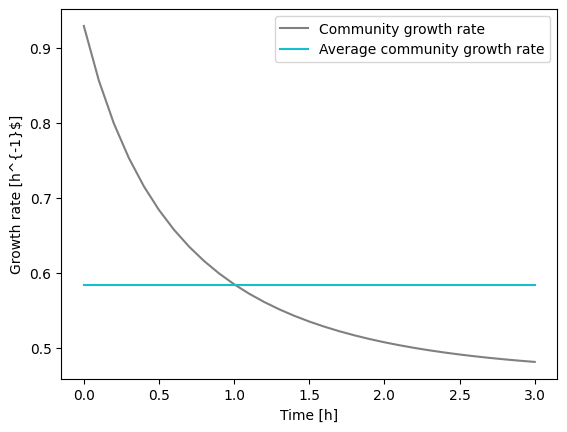

In [25]:
ls = dj.get_flux_values("X_comm") 

fls = [v / (biomasses["dleu"][i] + biomasses["dleu"][i]) for i, v in enumerate(ls)]

plt.plot(time_points[:-1], fls, color=f"grey", label=f"Community growth rate")
plt.plot(time_points[:-1], [sum(fls)/ len(fls)] * len(fls), color=f"C19", label=f"Average community growth rate")
plt.xlabel("Time [h]")
plt.ylabel(r'Growth rate [h^{-1}$]')
plt.legend()

<h3> K:L ratio

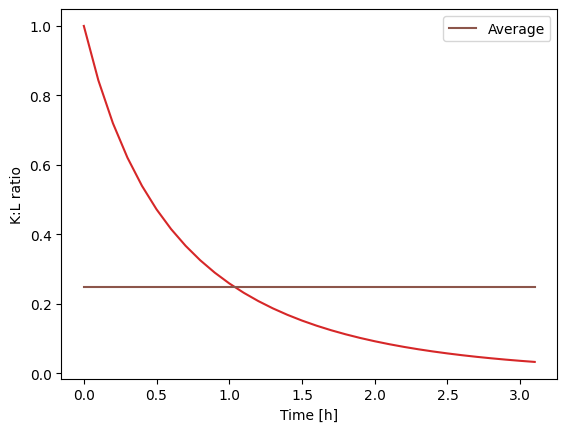

0.0328592962772698
0.2489825909202849


In [26]:
fls = numpy.divide(biomasses["dlys"], biomasses["dleu"]).tolist()


plt.plot(time_points, fls, color=f"C{3}")
plt.plot(time_points, [sum(fls)/len(fls)] *(len(fls)), color=f"C{5}", label=f"Average")
plt.xlabel("Time [h]")
plt.ylabel("K:L ratio")
plt.legend()


plt.show()

print(fls[-1])
print(sum(fls)/len(fls))
